# Capstone Project

![Notebook Logo](https://raw.githack.com/maov98/Data-Science-Learning/531d53a307587e424c7c29bb342792ffff61f513/background1.png)

# Table of Contents

## 1. Introduction
## 2. Data
## 3. Methodology
## 4. Results
## 5. Discussion
## 6. Conclussion
## 7. Application Code


# ==========================================================

# ==========================================================

# 1. Introduction

The idea for the capstone project is to create an advisory App that will recommend options for new businesses in specific areas of the **USA** territories based on the following criteria:
1. Number and type of existing business in the area 
2. Mean income 
3. population age 

The proposed solution can be used by entrepreneurs to define the type of business that will have a higher probability of success based on the current competition and the specific demographics of a selected area. Private investors with limited amount of capital are always looking for the optimal business opportunities, and they usually do not have the time or financial resources to conduct traditional market research. Therefore, an tool that can help them understand what business are operating in that area would help them to make an informed investing decision.

For the current project the city of **Milwaukee** in the state of **Wisconsin**, will be used to showcase the capabilities of the developed application.

# 2. Data

## 2.1 Data Sources

Three main data sources will be used for the following project:
1. Foursquare API will be used to determine the existing type and quantity of business for a particular area. 
2. Census API will provide the demographic data: Median income, age and average family size
3. Opendatasoft API will be used to detemrine the latitude nad longitude of the zip codes corresponding to the selected city
4. Webpage from the United States Department of Agriculture containing the state FIPS codes




## 2.2 Data Cleaning and Transformation

To reduce the need for data cleansing, it was decided to use APIs services as much as possible, so a large portion of time was devoted to locate free APIs that could provide the required information.
Webscraping technique was also used to obtain information where and API service was not available. for this particular project only in one instance was necessary to apply the Webscraping Technique. The link to each of the datasources used for this project is shown below:
1. [Foursquare API](https://foursquare.com/developers/login?continue=%2Fdevelopers%2Fapps):

    * Foursquare **"Places API"** offers real-time access to Foursquare’s global database of rich venue data and user content alson known as point-of-interest (POI) data, based on over 46K trusted sources for more than 190 countries around the world.

     
2. [Census API](https://www.census.gov/data/developers/data-sets/acs-5year.html):
    
    * US Census offers a variaty of datasets through its API for the current project "The American Community Survey (ACS) was used. "the ACS is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population.The 5-year estimates from the ACS are "period" estimates that represent data collected over a period of time. The primary advantage of using multiyear estimates is the increased statistical reliability of the data for less populated areas and small population subgroups".  
    
3. [OpenDataSoft API](https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/):
    * OpenDataSoft offers an open API to obtain tje latitude and longitude for ZIP codes in **USA**, for the following project the "US Zip Code Latitude and Longitude" dataset was used to obtain the latitude and longitude data for each ZIP within the selected city.
    
4. [Unites States Agriculture Department Site](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code):
    * Webpage that provides the FIPS codes for each state int he **USA** which are required to request data through the listed APIs above.
    
    
For those instances where a specific ZIP geolocation data was incorrect the approach was to remove that data point from the final dataset to eliminate bias during the detemrination of hte average business categories in each cluster. for the particular case of Milwaukee, four data points were identified as erroneous.Therefore, removed form the analysis.


# 3. Methodology

**Figure. 1** Provides a detailed process flow of the project application. A Detailed explanation of each step is provided in the following section of the report.





<img src="https://raw.githack.com/maov98/Data-Science-Learning/master/ProcessFlow.png" alt="PF" class="bg-primary mb-1">

> **Fig. 1 Application Process Flow**

A detailed explanation of the steps shown in **Fig. 1** is provided in this section.

* **Step 1:** Using the Web-scraping technique and the BeatifulSoup library in python. The alphanumeric codes for all **USA** states are obtained and stored in a Pandas Dataframe. The result of this operation is shown in **Table. 1**

* **Step 2:** This step allows the user to select the state and the city for which the analysis needs to be conducted, the state's alphanumeric codes fare automatically assigned to eliminate errors while requesting data through the APIs in later steps. Result is shown in **Fig. 2**
* **Step 3:** The longitude and latitude for all the ZIP codes in the selected state/city are obtained using OpenDataSoft API, and a map is created to visualize the data identify erroneous data which is eliminated from the dataset, the map visual of all the selected ZIP codes for the city of **MIlwaukee** are shown in **Figures 3 and 4:** Map of the Selected City. 
* **Step 4:** For the selected states, make a request to the Census API to obtain the following variables:
    - *ZCAT:* Created by the U.S. Census Bureau, they are generalized representations of ZIP Codes that have been assigned to census blocks. Therefore, ZCTAs are representative of geographic locations of populated areas 
    - *Average Family size*         
    - *Mean Annual Income (dollars)*       
    - *Total population*            
    - *Population between  25-29 years*          
    - *Population between  30-34 years*              
    - *Population between  35-39 years*              
    - *Population between  40-44 years*              
    - *Population between  45-49 years*              
    - *Population between  50-54 years*              
    - *Population between  55-59 years*              
    - *Population between  60-64 years*              
    - *State numeric code*  
 The result variables will be stored in a Dataframe, the absolute values for the population will be converted into percentage values of the total population to prepare the database for the clustering algorithm. The obtained dataframe is shown in **Table 2.** The variables listed above were chosen, based on the assumption that age, income and family composition are independent variables, therefore can be used to cluster population areas, and that the type of business that are prevalent in an specific area are correlated to these variables.

* **Step 5:** The Foursquare API will be used to obtain the 10 top sites that are within 15 miles of each ZIP code area, the selected radius will be used to minimize duplication of results in each ZIP code; the assumption made is that each ZIP area is within a 20 miles radius. the FourSquare API specifius the radius in meters, so a value of 24,000 meters will be used, which is equivalent to the 15 miles specification for this analysis.The resulting Dataframe is shown in **Table 3.**
* **Step 6:** Both Dataframes: Census and Venues will be merged to obtain a new data set that combines the Socioeconomic data and business categories for the selected city as shown in **Table 4.**
* **Step 7:** The resulting Dataframe will be normalized, and then the K-means algorithm will be applied to similar group clusters using the Skitlearn libraries, the resulting list of similar ZIP codes for the city of Milwaukee is shown in **Figure 5.**
* **Step 8:** All ZIP zones of the city of Milwaukee will be selected to identify the type of business that could be started in each area.
* **Step 9:** for each ZIP code, the developed app will calculate the mean of the quantity of business for the corresponding cluster, as Shown in ***Table 5.**
* **Step 10:** for each ZIP, the algorithm will subtract the current amount of business (by category) from the mean.
* **Step 11:** The algorithm will show the business categories that have less business categories than the average quantity in the corresponding cluster, indicating that this type of business is underrepresented and could be a potential option to start a new business in the selected ZIP. The results for all selected ZIP codes in the city of Milwaukee is shown in **Figures 7 throgh 10**


# 4. Results

## Step 1:

The BeatifulSoup library was used to scrap the US Agriculture Department website to obtain the FIPS codes. After reviewing the HTML document parsed by BeatifulSoup, it was determined that the required information was stored within the parent/child tags: <tbody> <tr>.
A Portion of the resulting Dataframe containing the FIPS codes for all the states in the **USA** is shown in the Figure below.

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/d78b94a6e6faf439bb5a070fab8aca1215b4c12e/Table1.jpg" alt="PF" class="bg-primary mb-1">

> **Table 1: FIPS codes for USA**

## Step 2:
Once the FIPS code Dataframe is constructed having the state name as the index, it is possible to obtain the alphanumeric code for any area of interest within the **USA**
The Alphanumeric codes for the state of **Wisconsin** are shown in the table below:

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/d78b94a6e6faf439bb5a070fab8aca1215b4c12e/Fig2.jpg" alt="PF" class="bg-primary mb-1">

> **Fig. 2: Wisconsin Codes**

## Step 3:
The map showing the approximate location of the ZIP codes for the city of **Milwaukee**, which were obtained using the OpenDataSoft API, is shown in the Figure below. Six data points were eliminated from the initial dataset since they were initially showing as over the waters of Lake Michigan.

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/Fig3.jpg" alt="PF" class="bg-primary mb-1">

> **Fig. 3: Map of Zip Codes for the City of Milwaukee**

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/Fig4.jpg" alt="PF" class="bg-primary mb-1">

> **Fig. 4: Map of Corrected Zip Codes for the City of Milwaukee**

## Step 4:
The final Dataframe obtained via the Census API request is shown in **Table 2**. Socioeconomic variables were obtained from the Census API for all ZIP codes of the state of Wisconsin. The initial data contained absolute values for the population ranges by age, which was converted to percentages of the total population to ensure they can be used for comparison purposes. The total population value was kept as an absolute number.

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/d78b94a6e6faf439bb5a070fab8aca1215b4c12e/table2.jpg" alt="PF" class="bg-primary mb-1">

> **Table 2: Census Data for the Zip codes of the City of Milwaukee**

## Step 5:
With the use of the foursquare function developed through the labs, it is possible to obtain the top N Business categories for the selected region, as shown in Table 3.
One key difference made to the original function developed in the lab was that the business categories were sorted based on the sum of the existing categories and not based on the average.

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/Table3.jpg" alt="PF" class="bg-primary mb-1">

> **Table 3: Top Business Categories for the City of Milwaukee**

## Step 6:

It is possible now to merge the Datasets and obtain in the previous two steps to create a collection of attributes that can be used to cluster the different areas. Pandas merge() function was used to achieve this objective; the "inner' method was selected to ensure that only zip codes that exist in both tables will get transfer to the new Pandas dataframeMerge. The resulting table is shown below:


<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/step6.jpg" alt="PF" class="bg-primary mb-1">

> **Table 4: Merged Dataframe with Clustering Attributes**

## Step 7:

With the use of the Skilearn library; it is possible to create a classification-algorithm  to cluster the zip zones based on the previous attributes, first the categories variables were transformed into numerical values using the get_dummies() function in Pandas, the data was normalized using the StandardScaler() function from Skilearn library. the selection of the number of clusters has been simplified to two options:
if the number of zip codes is greater than 20, then it will be divided by 4 to obtain the number of clusters; if not, then it will be 3.
The reason to include the most common business categories in the classification data is to capture localized taste preferences for the zip area that are cannot be inferred from the socioeconomic data.
The idea is to simplify the logic, and the Author is aware that this process can be refined in a future iteration of the application.
The resulting classification for the city of Milwaukee is shown in the Figure below.

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/step7.jpg" alt="PF" class="bg-primary mb-1">

> **Fig. 5: Cluster of Zip Codes for the City of Milwaukee**

## Step 8:
 Python function was developed to provide the user with all the zip codes that belong to the same cluster. This will allow to user to sear for business opportunities in a particular area; the function name is 
getsimilarzipcodes(commonZIPdf,indZIP), where two parameters are passed on: the Dataframe that has the clustering labels for the different zip and the selected zip code where the analysis will be conducted.
The result of the function showing all the zip-codes that are in the same cluster as the selected are shown in the Figure below:

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/step8.jpg" alt="PF" class="bg-primary mb-1">

> **Fig. 6: Selected Zip for Analysis**

## Step 9:
In step 9, a function was developed to calculate the difference between the mean quantity of business categories for the cluster and the current number of business categories in each zip code of the cluster.
A negative number indicated that for any zip code, there are less than the average number of businesses, and therefore, it suggests the potential to start a new business for that category. The resulting Dataframe is Shown in Figure 5.

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/step9.jpg" alt="PF" class="bg-primary mb-1">

> **Table 5: Deviation from Cluster Mean Quantity of Business Categories by Zip Code**

## Step 10 & 11
Additional functions were created to filter the Dataframe obtained in the previous step. Showing only the business categories with negative values, and also display them so the user can have a good understanding of all the available opportunities. The visualization of all the opportunities for all clusters in the city of Milwaukee is shown in Figures 7 through 9.  

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/step11a.jpg" alt="PF" class="bg-primary mb-1">

> **Fig. 7 Business Opportunities for the First Cluster**

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/step11b.jpg" alt="PF" class="bg-primary mb-1">

> **Fig. 8 Business Opportunities for the Second Cluster**

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/step11c.jpg" alt="PF" class="bg-primary mb-1">

> **Fig. 9 Business Opportunities for the Third and Fourth Cluster**

<img src="https://rawcdn.githack.com/maov98/Data-Science-Learning/e83fd9ea87b1724386a25bee2e0154094825851a/step11d.jpg" alt="PF" class="bg-primary mb-1">

> **Fig. 10 Business Opportunities for the Fifth Cluster**

# 5. Discussion
> Based on the results obtained through this process is possible to determine that Milwaukee needs more BBQ restaurants overall. Coffeeshops and Italian restaurants are also good candidates for most of the analyzed zip codes.
Cluster zero (yellow circles in Fig.5) needs more specialized and premium businesses like spas, french restaurants, etc. This finding indicates affluent zip areas where residents are willing to spend more on specialty business and entertainment.

# 6. Conclussion

With the use of data science tools, it has been possible to develop in a short period a simple application that can help entrepreneurs determine business opportunities that have the potential to succeed based on socioeconomic data and current competition.
The use of API has automated the analysis that can be replicated for any city within the USA.


# 7. Application Code

In [1]:

# importing required libraries
import numpy as np
import pandas as pd 
#Importing required libraries for Web Scraping
import urllib.request
from bs4 import BeautifulSoup
#import libraries for maps
import folium # map rendering library
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#libraries to manage JSON and web requests
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#import libraries for geolocation
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#math operations library
import math


### Step 1: Obtaining search keys for US States
The following section provides the user with the standard alpha-nueric code for **USA** states, which are  codes used by the Census API.

[](content:references)

In [2]:
#URL that contains the FIPS codes information for the USA
url = 'https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696'
#Using Beatiful Soup library to get the html information
FISP_Codes = urllib.request.urlopen(url)
soup = BeautifulSoup(FISP_Codes, "html.parser")
#Saving html object to txt file
with open('url.txt', 'w', encoding='utf-8') as f_out:
    f_out.write(soup.prettify());

In [3]:
# Defining required array to store information
FipsIndex=[] #stores the sate name
FipsCol1=[] #stores the Alpha code for the state
FipsCol2=[] # stores the numeric code for the state
stateDic = {} #dictionary to store all the information

# the parsed object reveals that the data is stored between the <tr> tag which resides in the <tbody> tag.
# BeatifulSoup.select() method is used to retrieve the data from the parsed document

searchResults = soup.select("tbody tr")

# clean the extracted text and store it the arrays

for j,item in enumerate(searchResults):
    temp_var = searchResults[j].get_text(separator='/',strip=True)
    temp_var2 = temp_var.split('/')
    FipsIndex.append(temp_var2[0])
    FipsCol1.append(temp_var2[1])
    FipsCol2.append(temp_var2[2])
    #Creates a dictionary
    stateDic.update({temp_var2[0]:[temp_var2[1],temp_var2[2]]})
    
#creates a dataframe    
FIPSdf = pd.DataFrame(data={FipsCol1[0]:FipsCol1[1:],FipsCol2[0]:FipsCol2[1:]},index=FipsIndex[1:])
FIPSdf


,Postal Code,FIPS
Alabama,AL,01
Alaska,AK,02
Arizona,AZ,04
Arkansas,AR,05
California,CA,06
Colorado,CO,08
Connecticut,CT,09
Delaware,DE,10
Florida,FL,12
Georgia,GA,13


**Table. 1** FIPS Codes for States in US


> FIPS state codes were numeric and two-letter alphabetic codes defined in U.S. Federal Information Processing Standard Publication ("FIPS PUB") 5-2 to identify U.S. states and certain other associated areas. The standard superseded FIPS PUB 5-1 on May 28, 1987, and was superseded on September 2, 2008, by ANSI standard INCITS 38:2009.[1]

[Wikipedia Source](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code)

### Step 2: Select State and City to Conduct Analysis
Opendatasoft is a free service that provides geolocation. However, as a downside, its free version does not provide the most accurate geolocation data 

In [4]:

#Create Search Variables 
stateName = 'Wisconsin'
stateAlphaCode = FIPSdf.loc[stateName]['Postal Code']
stateNumCode = FIPSdf.loc[stateName]['FIPS']
print(stateAlphaCode +':'+stateNumCode)
City = 'Milwaukee'


WI:55


### Step 3: Obtaining the geolocation data for the selected City and State


[OpenDataSoft](https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/)


#### Creating a function to obtain geolocation data for any state and city using the REST API from OpenDataSoft


In [5]:
#function to obtain geolocation data for any state and city using the REST API from OpenDataSoft
def get_location(state, city):
    
    # obtain all ZIP codes for a state
    url = 'https://public.opendatasoft.com/api/records/1.0/search/?dataset=us-zip-code-latitude-and-longitude&q=&rows=800&refine.state={}'.format(state)
    apicall = requests.get(url).json()
    geodf = json_normalize(apicall['records'])
    geodf.columns = [column.split('.')[-1] for column in geodf.columns]  
    geodf2 = geodf[['city','latitude','longitude','zip']]
    geodf2.sort_values('zip',inplace=True)
    geodf2.reset_index(drop=True,inplace = True)
    # filter df for the specific city
    citydf = geodf2[geodf2['city']==city]
    citydf.rename(columns={'zip':'zip code'},inplace=True)
    citydf.set_index('zip code',inplace=True)
    
   
    return citydf




In [6]:

City_zip_codes= get_location(stateAlphaCode, City)
filteringzipcodes = np.array(City_zip_codes.index)
City_zip_codes.head()


/Users/miguelortiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/miguelortiz/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,city,latitude,longitude
zip code,,,
53201,Milwaukee,43.011264,-87.958409
53203,Milwaukee,43.037963,-87.915480
53204,Milwaukee,43.017414,-87.926250
53205,Milwaukee,43.053763,-87.934730
53206,Milwaukee,43.076179,-87.934760


**Table. 2** Geolocation Data for Selected City

### Step 3.1:Visualizing the Dataset

In [7]:
#obtaining the geolocation for the selected city


address = '{},{}'.format(City,stateAlphaCode)

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} City are {}, {}.'.format(City,latitude, longitude))

The geograpical coordinate of Milwaukee City are 43.0349931, -87.922497.


In [8]:

# create map of Milwaukee using latitude and longitude values
mapCity = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, zip_codes in zip(City_zip_codes['latitude'], City_zip_codes['longitude'],City_zip_codes.index):
    label = '{},{},{}'.format(zip_codes,lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mapCity)  
    
mapCity

**Fig. 2** Visualization of the Obtained ZIP Codes

After visualizing the data it is possible to identify that there are some ZIP codes that have the wrong location data, the following section will elimnate those data points from the dataset.

### Step 3.2: Visualizing the Corrected Dataset

```{attention} Through the visualization it is possible to identify that there are errors in the geolaction data, since some zip codes are showing on the water (Lake Michigan). The next section of code  will remove those datapoints.
```

In [9]:
# lets drop the wrong data poins
City_zip_codes.drop(City_zip_codes[City_zip_codes['longitude']>-87.88].index,inplace = True)


In [10]:
City_zip_codes

,city,latitude,longitude
zip code,,,
53201,Milwaukee,43.011264,-87.958409
53203,Milwaukee,43.037963,-87.915480
53204,Milwaukee,43.017414,-87.926250
53205,Milwaukee,43.053763,-87.934730
53206,Milwaukee,43.076179,-87.934760
53207,Milwaukee,42.985465,-87.899980
53208,Milwaukee,43.047863,-87.966180
53209,Milwaukee,43.119410,-87.947270
53210,Milwaukee,43.068962,-87.974230


In [11]:
# create map of Milwaukee using latitude and longitude values
mapCorrected = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, zip_codes in zip(City_zip_codes['latitude'], City_zip_codes['longitude'],City_zip_codes.index):
    label = '{},{},{}'.format(zip_codes,lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mapCorrected)  
    
mapCorrected

**Fig. 3** Visualization of the Corrected Dataset of ZIP Codes

### Step 4: Obtaining demographic and Income data from the Census API

In [12]:
#Defining and executing API request
key = 'e6224db4f07296018e61e4c5c81b5a59f04acd2c'
CensusVariables = 'S1101_C01_004E,S1901_C02_013E,S0101_C01_001E,S0101_C01_007E,S0101_C01_008E,S0101_C01_009E,S0101_C01_010E,S0101_C01_011E,S0101_C01_012E,S0101_C01_013E,S0101_C01_014E'
CensusUrl = 'https://api.census.gov/data/2019/acs/acs5/subject?get=NAME,{}&for=zip%20code%20tabulation%20area:*&in=state:{}&key={}'.format(CensusVariables,stateNumCode,key)
CensCall = requests.get(CensusUrl).json()

In [13]:
# The following section created a dataframe form the JSON objective obtained through the API request
ColumnNames = CensCall[0]
Censusdf= pd.DataFrame(CensCall[1:])
ColumnNames[1:-3]
#This section loads a mapping file that contains the viable name for the obtained keys. 
#This was obtained from the API Documentation
CensusVarURL = 'https://github.com/maov98/Data-Science-Learning/blob/1ca8306902a1415e82dd73a92f7c3cd74ef5c26d/Book1.csv?raw=true'
CensusVardf = pd.read_csv(CensusVarURL)
#Creates a Dictionary that can be referenced later
CensusVarDict = dict(zip(CensusVardf.Name,CensusVardf.Label))


In [14]:
#This section will replace the variable alphanumeric codes with their corresponding names, 
#taken form the mapping file loaded previosly
for n,i in enumerate(CensCall[0]):
    if ((n>0) & (n<len(CensCall[0])-2)):
        CensCall[0][n]=CensusVarDict[i]
CensCall[0][0]="ZCAT"     

In [15]:
#Renaming of the dataframe columns
Censusdf.columns=CensCall[0]
Censusdf.columns = [col.split("!!")[-1] for col in Censusdf.columns]
Censusdf.head()


,ZCAT,Average family size,Mean income (dollars),Total population,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,state,zip code tabulation area
0,ZCTA5 54874,3.00,94775,3900,212,168,308,234,257,244,345,395,55,54874
1,ZCTA5 54902,2.89,77050,22415,1610,1479,1232,1120,1532,1634,1486,1302,55,54902
2,ZCTA5 53224,3.51,71418,22308,1545,1948,1360,1210,1081,1453,1117,1253,55,53224
3,ZCTA5 53404,3.22,62771,14996,1041,1207,786,538,889,902,928,777,55,53404
4,ZCTA5 53529,2.87,116641,2068,137,203,109,126,146,141,195,166,55,53529


In [16]:
Censusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 14 columns):
ZCAT                        774 non-null object
Average family size         774 non-null object
Mean income (dollars)       774 non-null object
Total population            774 non-null object
25 to 29 years              774 non-null object
30 to 34 years              774 non-null object
35 to 39 years              774 non-null object
40 to 44 years              774 non-null object
45 to 49 years              774 non-null object
50 to 54 years              774 non-null object
55 to 59 years              774 non-null object
60 to 64 years              774 non-null object
state                       774 non-null object
zip code tabulation area    774 non-null object
dtypes: object(14)
memory usage: 84.7+ KB


In [17]:
#This section will convert specific columns from the dataframe from string objects into numeric values
for i,item in enumerate(Censusdf.columns):
    if (i>0 and (i<(len(Censusdf.columns)-2))):
        Censusdf[item]=pd.to_numeric(Censusdf[item])
        
        
#This section will convert the absolute numbers obtained from the API into percentajes of the total population    
    if (i>3 and (i<(len(Censusdf.columns)-2))):
        
        Censusdf[item]=Censusdf[item]/Censusdf['Total population']
Censusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 14 columns):
ZCAT                        774 non-null object
Average family size         774 non-null float64
Mean income (dollars)       774 non-null int64
Total population            774 non-null int64
25 to 29 years              769 non-null float64
30 to 34 years              769 non-null float64
35 to 39 years              769 non-null float64
40 to 44 years              769 non-null float64
45 to 49 years              769 non-null float64
50 to 54 years              769 non-null float64
55 to 59 years              769 non-null float64
60 to 64 years              769 non-null float64
state                       774 non-null object
zip code tabulation area    774 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 84.7+ KB


In [18]:
Censusdf.rename(columns={'zip code tabulation area':'zip code'},inplace=True)
Censusdf.sort_values(by=['zip code'],inplace = True)
Censusdf.set_index('zip code',inplace = True)
Censusdf['state']= stateName
Censusdf.head()

,ZCAT,Average family size,Mean income (dollars),Total population,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,state
zip code,,,,,,,,,,,,,
53001,ZCTA5 53001,2.73,105547,1882,0.036132,0.035600,0.080765,0.051010,0.065887,0.091923,0.111583,0.097237,Wisconsin
53002,ZCTA5 53002,2.83,101648,2305,0.080260,0.075054,0.047289,0.050759,0.086334,0.072451,0.107158,0.075488,Wisconsin
53003,ZCTA5 53003,3.05,96593,161,0.000000,0.093168,0.000000,0.055901,0.155280,0.031056,0.068323,0.074534,Wisconsin
53004,ZCTA5 53004,3.05,101661,3334,0.048590,0.051290,0.068686,0.074385,0.093881,0.082783,0.081584,0.048890,Wisconsin
53005,ZCTA5 53005,3.00,158475,20124,0.041890,0.062314,0.057543,0.056897,0.060127,0.062960,0.080501,0.078811,Wisconsin


### Step 5: Using Foursquare API to obtain current businesses by ZIP code

In [19]:
CLIENT_ID = 'K3NJQJUFFXECQSBF5OV02FKWGBBK5TMSMNP44VA01AUZ2GPY' # your Foursquare ID
CLIENT_SECRET = '0UW2QVVVS21JMLI0JOQJOPFO30WRUTCXT3ZL4WYIWGAUXYAT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value


#### This is the function to get all nearby venues to a specific location

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=24000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
CityVenues = getNearbyVenues(names=City_zip_codes.index,
                                   latitudes=City_zip_codes['latitude'],
                                   longitudes=City_zip_codes['longitude'])

53201
53203
53204
53205
53206
53207
53208
53209
53210
53211
53212
53213
53215
53216
53217
53218
53219
53220
53222
53223
53224
53226
53227
53233
53259
53263
53267
53268
53270
53277
53278
53280
53281
53290
53293


In [22]:
CityVenues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,53201,43.011264,-87.958409,Miller Park (American Family Field),43.028312,-87.971459,Baseball Stadium
1,53201,43.011264,-87.958409,Leon's Frozen Custard,42.987796,-87.948607,Ice Cream Shop
2,53201,43.011264,-87.958409,Taqueria Buenavista,43.010372,-87.987535,Mexican Restaurant
3,53201,43.011264,-87.958409,Bryant's Cocktail Lounge,43.014263,-87.922749,Cocktail Bar
4,53201,43.011264,-87.958409,Milwaukee County Winter Farmers Market,43.025909,-87.945133,Garden


In [23]:
# one hot encoding
City_onehot = pd.get_dummies(CityVenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
City_onehot['Neighborhood'] = CityVenues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [City_onehot.columns[-1]] + list(City_onehot.columns[:-1])
City_onehot = City_onehot[fixed_columns]
City_onehot.rename(columns={'Neighborhood':'zip code'},inplace = True)
City_onehot.head()

,zip code,American Restaurant,Art Museum,BBQ Joint,Bakery,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,...,Theater,Trail,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Shop,Winery,Zoo
0,53201,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,53201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,53201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Group rows by neighborhood and by taking the sum of the frequency of occurrence of each category

In [24]:
City_grouped = City_onehot.groupby('zip code').sum().reset_index()
City_grouped.head()

,zip code,American Restaurant,Art Museum,BBQ Joint,Bakery,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,...,Theater,Trail,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Shop,Winery,Zoo
0,53201,2,1,2,1,3,1,1,0,0,...,1,0,1,0,1,0,1,0,0,1
1,53203,2,1,1,2,4,1,1,1,0,...,1,1,1,1,1,0,1,0,0,0
2,53204,2,1,2,3,3,1,1,0,0,...,1,1,1,1,1,0,1,0,0,0
3,53205,2,1,1,2,3,1,1,1,0,...,1,1,1,1,0,0,1,0,0,0
4,53206,1,1,1,2,3,1,1,1,0,...,1,1,1,1,0,0,1,0,0,0


### Function to sort the venues in descending order.

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    if num_top_venues<=len(row_categories_sorted.index.values):
        returnvalue = row_categories_sorted.index.values[0:num_top_venues]
        
    else:
        returnvalue = row_categories_sorted.index.values[0:len(row_categories_sorted.index.values)]
        
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:

num_top_venues = 10



indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['zip code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
City_venues_sorted = pd.DataFrame(columns=columns)
City_venues_sorted['zip code'] = City_grouped['zip code']

for ind in np.arange(City_grouped.shape[0]):
    City_venues_sorted.iloc[ind, 1:] = return_most_common_venues(City_grouped.iloc[ind, :], num_top_venues)

City_venues_sorted.head()

,zip code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,53201,Coffee Shop,Park,Italian Restaurant,Hotel,Brewery,Bar,Steakhouse,Pizza Place,Seafood Restaurant,BBQ Joint
1,53203,Coffee Shop,Italian Restaurant,Park,Brewery,Hotel,Bar,Grocery Store,Pizza Place,Seafood Restaurant,Bakery
2,53204,Coffee Shop,Park,Italian Restaurant,Brewery,Hotel,Bar,Grocery Store,Bakery,Pizza Place,Breakfast Spot
3,53205,Coffee Shop,Italian Restaurant,Brewery,Hotel,Park,Grocery Store,Café,Pizza Place,Bar,Burger Joint
4,53206,Coffee Shop,Brewery,Italian Restaurant,Park,Hotel,Bar,Pizza Place,Grocery Store,Steakhouse,Burger Joint


In [27]:
City_venues_sorted.set_index('zip code',inplace=True)
City_venues_sorted.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
zip code,,,,,,,,,,
53201,Coffee Shop,Park,Italian Restaurant,Hotel,Brewery,Bar,Steakhouse,Pizza Place,Seafood Restaurant,BBQ Joint
53203,Coffee Shop,Italian Restaurant,Park,Brewery,Hotel,Bar,Grocery Store,Pizza Place,Seafood Restaurant,Bakery
53204,Coffee Shop,Park,Italian Restaurant,Brewery,Hotel,Bar,Grocery Store,Bakery,Pizza Place,Breakfast Spot
53205,Coffee Shop,Italian Restaurant,Brewery,Hotel,Park,Grocery Store,Café,Pizza Place,Bar,Burger Joint
53206,Coffee Shop,Brewery,Italian Restaurant,Park,Hotel,Bar,Pizza Place,Grocery Store,Steakhouse,Burger Joint


### Step 6: Merge Census and Venue Datasets

In [28]:
### Merging Both dataframes:
Consdf = Censusdf.merge(City_venues_sorted,how='inner',left_index=True,right_index=True)
Consdf.drop(['state','ZCAT'],axis=1,inplace=True)
Consdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 53203 to 53233
Data columns (total 21 columns):
Average family size       23 non-null float64
Mean income (dollars)     23 non-null int64
Total population          23 non-null int64
25 to 29 years            23 non-null float64
30 to 34 years            23 non-null float64
35 to 39 years            23 non-null float64
40 to 44 years            23 non-null float64
45 to 49 years            23 non-null float64
50 to 54 years            23 non-null float64
55 to 59 years            23 non-null float64
60 to 64 years            23 non-null float64
1st Most Common Venue     23 non-null object
2nd Most Common Venue     23 non-null object
3rd Most Common Venue     23 non-null object
4th Most Common Venue     23 non-null object
5th Most Common Venue     23 non-null object
6th Most Common Venue     23 non-null object
7th Most Common Venue     23 non-null object
8th Most Common Venue     23 non-null object
9th Most Common Venue     23 non-

In [29]:
Consdf.head()

,Average family size,Mean income (dollars),Total population,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
zip code,,,,,,,,,,,,,,,,,,,,,
53203,2.20,157150,1726,0.380649,0.096176,0.020857,0.037659,0.025492,0.028389,0.070684,...,Coffee Shop,Italian Restaurant,Park,Brewery,Hotel,Bar,Grocery Store,Pizza Place,Seafood Restaurant,Bakery
53204,3.89,47941,38678,0.089431,0.078908,0.078830,0.061818,0.065826,0.052252,0.038239,...,Coffee Shop,Park,Italian Restaurant,Brewery,Hotel,Bar,Grocery Store,Bakery,Pizza Place,Breakfast Spot
53205,3.66,41502,8908,0.075326,0.051863,0.067916,0.052537,0.043781,0.043556,0.057701,...,Coffee Shop,Italian Restaurant,Brewery,Hotel,Park,Grocery Store,Café,Pizza Place,Bar,Burger Joint
53206,3.68,39130,22520,0.074112,0.072025,0.060879,0.057016,0.050755,0.054041,0.065497,...,Coffee Shop,Brewery,Italian Restaurant,Park,Hotel,Bar,Pizza Place,Grocery Store,Steakhouse,Burger Joint
53207,2.90,83788,36889,0.107945,0.106454,0.095638,0.069506,0.059286,0.058852,0.074927,...,Park,Hotel,Coffee Shop,Brewery,Italian Restaurant,Pizza Place,Bar,Bakery,Café,Seafood Restaurant


### Step 7: Cluster ZIP codes 

In [30]:
#Convert Categorical Data into attribute data
normalizedf = pd.get_dummies(Consdf)


# Normalize the dataset
from sklearn.preprocessing import StandardScaler
X = normalizedf.values
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

#define the number of cluster based on the number of attributes in the dataset
if(len(normalizedf.index)>=20):
    clusterNum = int((len(normalizedf.index)/4))
else:
    clusterNum = 3
# Cluster ZIP codes based on the defined attributes
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

Clusterlist = np.unique(labels)
commonZIPdf = pd.DataFrame(data={'Cluster #':labels},index = normalizedf.index)
# normalizedf.iloc[:,0:10]

commonZIPdf

[1 0 3 3 4 0 0 0 1 0 1 0 0 2 0 4 4 4 4 4 1 4 3]


,Cluster #
zip code,
53203,1
53204,0
53205,3
53206,3
53207,4
53208,0
53209,0
53210,0
53211,1


In [31]:
Consdf1 = Consdf.merge(commonZIPdf,how='inner',left_index=True,right_index=True)
Consdf1 = Consdf1.merge(City_zip_codes,how='left',left_index=True,right_index=True)
Consdf1


,Average family size,Mean income (dollars),Total population,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,...,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster #,city,latitude,longitude
zip code,,,,,,,,,,,,,,,,,,,,,
53203,2.20,157150,1726,0.380649,0.096176,0.020857,0.037659,0.025492,0.028389,0.070684,...,Hotel,Bar,Grocery Store,Pizza Place,Seafood Restaurant,Bakery,1,Milwaukee,43.037963,-87.91548
53204,3.89,47941,38678,0.089431,0.078908,0.078830,0.061818,0.065826,0.052252,0.038239,...,Hotel,Bar,Grocery Store,Bakery,Pizza Place,Breakfast Spot,0,Milwaukee,43.017414,-87.92625
53205,3.66,41502,8908,0.075326,0.051863,0.067916,0.052537,0.043781,0.043556,0.057701,...,Park,Grocery Store,Café,Pizza Place,Bar,Burger Joint,3,Milwaukee,43.053763,-87.93473
53206,3.68,39130,22520,0.074112,0.072025,0.060879,0.057016,0.050755,0.054041,0.065497,...,Hotel,Bar,Pizza Place,Grocery Store,Steakhouse,Burger Joint,3,Milwaukee,43.076179,-87.93476
53207,2.90,83788,36889,0.107945,0.106454,0.095638,0.069506,0.059286,0.058852,0.074927,...,Italian Restaurant,Pizza Place,Bar,Bakery,Café,Seafood Restaurant,4,Milwaukee,42.985465,-87.89998
53208,3.48,62575,30161,0.094957,0.075893,0.061934,0.060641,0.060111,0.060111,0.065217,...,Hotel,Steakhouse,Pizza Place,Café,Burger Joint,Seafood Restaurant,0,Milwaukee,43.047863,-87.96618
53209,3.32,61865,46616,0.075639,0.072186,0.054509,0.061696,0.061889,0.061760,0.059679,...,Hotel,Grocery Store,Deli / Bodega,Pizza Place,Steakhouse,New American Restaurant,0,Milwaukee,43.119410,-87.94727
53210,3.49,58954,26793,0.074049,0.069309,0.066062,0.053447,0.049379,0.054455,0.071213,...,Hotel,Pizza Place,Grocery Store,Steakhouse,Mexican Restaurant,Bakery,0,Milwaukee,43.068962,-87.97423
53211,2.87,157886,35457,0.099670,0.076854,0.050089,0.043546,0.041318,0.041797,0.041543,...,Bar,Grocery Store,Italian Restaurant,Seafood Restaurant,Bakery,Burger Joint,1,Milwaukee,43.083012,-87.88590


In [66]:
# create map of Milwaukee using latitude and longitude values
mapClusters = folium.Map(location=[latitude, longitude], zoom_start=12)
#set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, zip_codes, cluster in zip(Consdf1['latitude'], Consdf1['longitude'],City_zip_codes.index, Consdf1['Cluster #']):
    label = '{},{},{}'.format(zip_codes,lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1,
        parse_html=False).add_to(mapClusters)  
    
mapClusters

In [33]:
#This step will create an array of the similar ZIP codes based on the cluster number obtained previously
listSimilarZIP = []
for i,item in enumerate(Clusterlist):
    listSimilarZIP.append(commonZIPdf[commonZIPdf['Cluster #']==item].index)

listSimilarZIP


[Index(['53204', '53208', '53209', '53210', '53212', '53215', '53216', '53218'], dtype='object', name='zip code'),
 Index(['53203', '53211', '53213', '53226'], dtype='object', name='zip code'),
 Index(['53217'], dtype='object', name='zip code'),
 Index(['53205', '53206', '53233'], dtype='object', name='zip code'),
 Index(['53207', '53219', '53220', '53222', '53223', '53224', '53227'], dtype='object', name='zip code')]

In [49]:
# This Function will return an array of the similar ZIPs for any particular ZIP code 
# for which an analysis needs to be conducted
def getsimilarzipcodes(df,zipcode):
    clusterLabel = df.loc[zipcode]['Cluster #']
    
    similarziplist = np.array(df[df['Cluster #']==clusterLabel].index)
    return similarziplist

In [72]:
indZIP = listSimilarZIP[3][0]
print(indZIP)

53205


### Step 8: Select ZIP to Analyze
The following function will allow the user to get a list of all the ZIP codes that belong to same cluster of the area where the analysis needs to be conducted.

In [39]:
# as an example, for the selected ZIP code: the list of all the ZIP codes that belong to the same Cluster 
#is shown below:
getsimilarzipcodes(commonZIPdf,indZIP)

1


array(['53203', '53211', '53213', '53226'], dtype=object)

### Step 9: Calculate the Average Quantity of Business Categories
In the following section a function is created to allow the user to get a dataframe that shows the average quantity of business categories for the cluster of the ZIP code of interest.

In [40]:
#This function will create a dataframe of the mean nymber of business categories for the provided group of ZIP
def getAllOpp(zipgroup,dataframe):
    businessdf = pd.DataFrame(data={'Cluster Mean':dataframe.replace(0,np.NAN).mean(axis=0).round(decimals=0).astype(int)})
    for i,item in enumerate(zipgroup):
        businessdf[item]=businessdf['Cluster Mean']-dataframe.iloc[i,:]
    return businessdf

In [73]:
#Create a copy of the original dataframe and filter it, using the cluster for which the analysi is required
Copydf = City_grouped.set_index('zip code')

#Visualize the first element of the 4th cluster
print(indZIP)
selected_zip = getsimilarzipcodes(commonZIPdf,indZIP)
print(selected_zip)

53205
['53205' '53206' '53233']


In [68]:



#The following function will create a dataframe that shows the difference
#between the average number of business categories in the cluster and its individual ZIP codes
#A negative number indicates that there are less than averae. business type in the zip code
Meandf = getAllOpp(selected_zip,Copydf)
Meandf.head()

53205
['53205' '53206' '53233']


,Cluster Mean,53205,53206,53233
American Restaurant,2,0,0,0
Art Museum,1,0,0,0
BBQ Joint,1,-1,0,-1
Bakery,2,1,0,-1
Bar,3,0,-1,0


### Step 10: Select Business Categories for Which the Current Count  is Less than the Average for the Cluster
Th following function will filter out the business categories that have a count less than average for the corresponding cluster. this is the indicator that an opportunity exist to launh  this type of business in the selected zip code

In [61]:
# This function will provide the business opportunities that 
def getIndOpp(allOppdf,selectedZIP):
    responseArray = []
    respDic = {}
    for i,item in enumerate(selectedZIP):
        opp = allOppdf[allOppdf[selectedZIP[i]]<0][[selectedZIP[i]]].sort_values(by=[selectedZIP[i]])
        
        if(len(opp.columns)>0):
            
            respDic.update({selectedZIP[i]: [np.array(opp.index),(np.absolute(np.array(opp[selectedZIP[i]])))]})
            
        else:
            respDic.update({selectedZIP[i]: ['No suggestions','No Values']})
#        
    return respDic

    
    

In [64]:
#The results of the business types that show negative value.  
#Therefore, represent a business opportunities are returned as both: Array and Diuctionary formsresultArray, 
##resultDic = getIndOpp(getAllOpp(selectedzip,MWdf),selectedzip)
#The following function will create a dataframe that shows the difference
#between the average number of business categories in the cluster and its individual ZIP codes
#A negative number indicates that there are less than averae. business type in the zip code

resultDic = getIndOpp(Meandf,selected_zip);

# a view of the dictionary showing for each specific ZIP within the cluster, 
#the business categories that can be started in each zip
print(resultDic);

{'53205': [array(['BBQ Joint', 'Food & Drink Shop', 'Park', 'Steakhouse'],
      dtype=object), array([1, 1, 1, 1])], '53206': [array(['Bar', 'Grocery Store', 'Italian Restaurant'], dtype=object), array([1, 1, 1])], '53233': [array(['BBQ Joint', 'Bakery', 'Farmers Market', 'Food & Drink Shop',
       'Italian Restaurant'], dtype=object), array([1, 1, 1, 1, 1])]}


### Step 11: Visualize the results
The following function display a summary of the results for a specific cluster

In [56]:
def visualizeResults(inputDic):
    
    ziptodislay2=list(inputDic.keys())
    numberPoints = len(ziptodislay2)
    axheight=6
    axwidth=6
    counter2=0
    figCol2 = 2
    figRows2 = int(math.ceil((len(ziptodislay2)/2)))
    if(numberPoints>1):
        fig2,axs1 =  plt.subplots(figRows2,figCol2,figsize=(figCol2*axwidth, figRows2*axheight), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios': [4, 4]});

        for j in range(figRows2):
            for k in range(figCol2):

                if (counter2<numberPoints):

                    axs1[j][k].set_title('Analysis of ZIP Code: {}'.format(ziptodislay2[counter2]))
                    axs1[j][k].bar(inputDic[ziptodislay2[counter2]][0],inputDic[ziptodislay2[counter2]][1])
                    axs1[j][k].set_xlabel('Business Category')
                    axs1[j][k].set_ylabel('Number of Potential \n Business for the Area')
                    axs1[j][k].tick_params(axis='x', labelrotation = 90)
                    axs1[j][k].yaxis.set_major_locator(MaxNLocator(integer=True))
                    counter2+=1    
        
        
    elif(numberPoints==1):
        fig2,axs1 =  plt.subplots(figsize=(axwidth, axheight), facecolor='w', edgecolor='k')
        
        axs1.set_title('Analysis of ZIP Code: {}'.format(ziptodislay2[counter2]))
        axs1.bar(inputDic[ziptodislay2[counter2]][0],inputDic[ziptodislay2[counter2]][1])
        axs1.set_xlabel('Business Category')
        axs1.set_ylabel('Number of Potential \n Business for the Area')
        axs1.tick_params(axis='x', labelrotation = 90)
        axs1.yaxis.set_major_locator(MaxNLocator(integer=True))
        counter2+=1
    
    elif(numberPoints==0):
        fig2,axs1 =  plt.subplots(figsize=(axwidth, axheight), facecolor='w', edgecolor='k')

        
        axs1.set_title('NA')
        axs1.set_xlabel('Business Category')
        axs1.set_ylabel('Number of Potential \n Business for the Area')
        axs1.tick_params(axis='x', labelrotation = 90)
        axs1.yaxis.set_major_locator(MaxNLocator(integer=True))
        counter2+=1
           

    fig2.suptitle('Business Opportunities for Cluster {} in the city of {}'.format(commonZIPdf.loc[ziptodislay2[0]].values,City))

    fig2.tight_layout(pad=6.0)
   
    

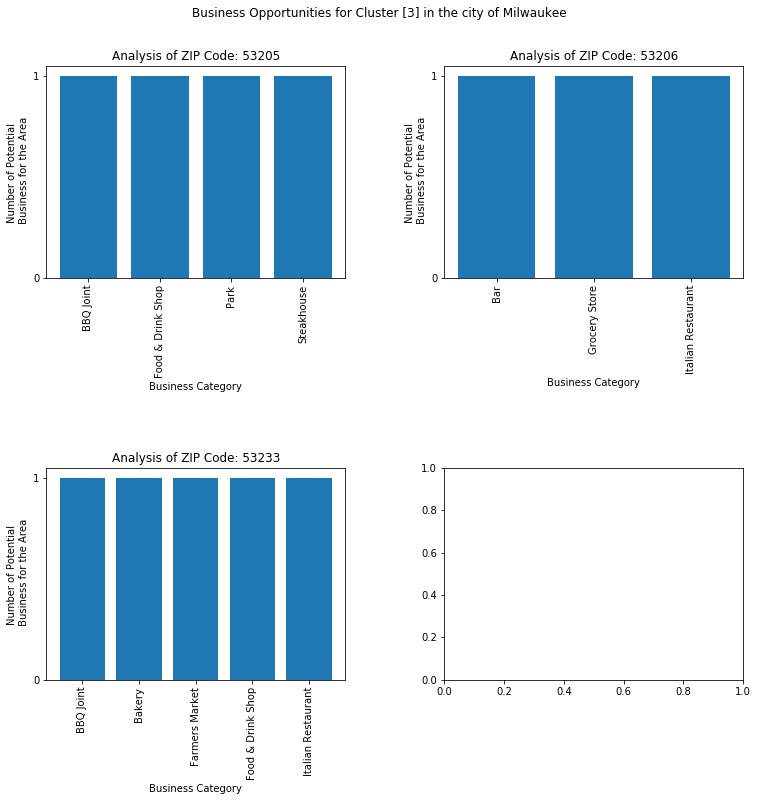

In [60]:
#Visualizing the results for a particular cluster, in this case: cluster 3
visualizeResults(resultDic)

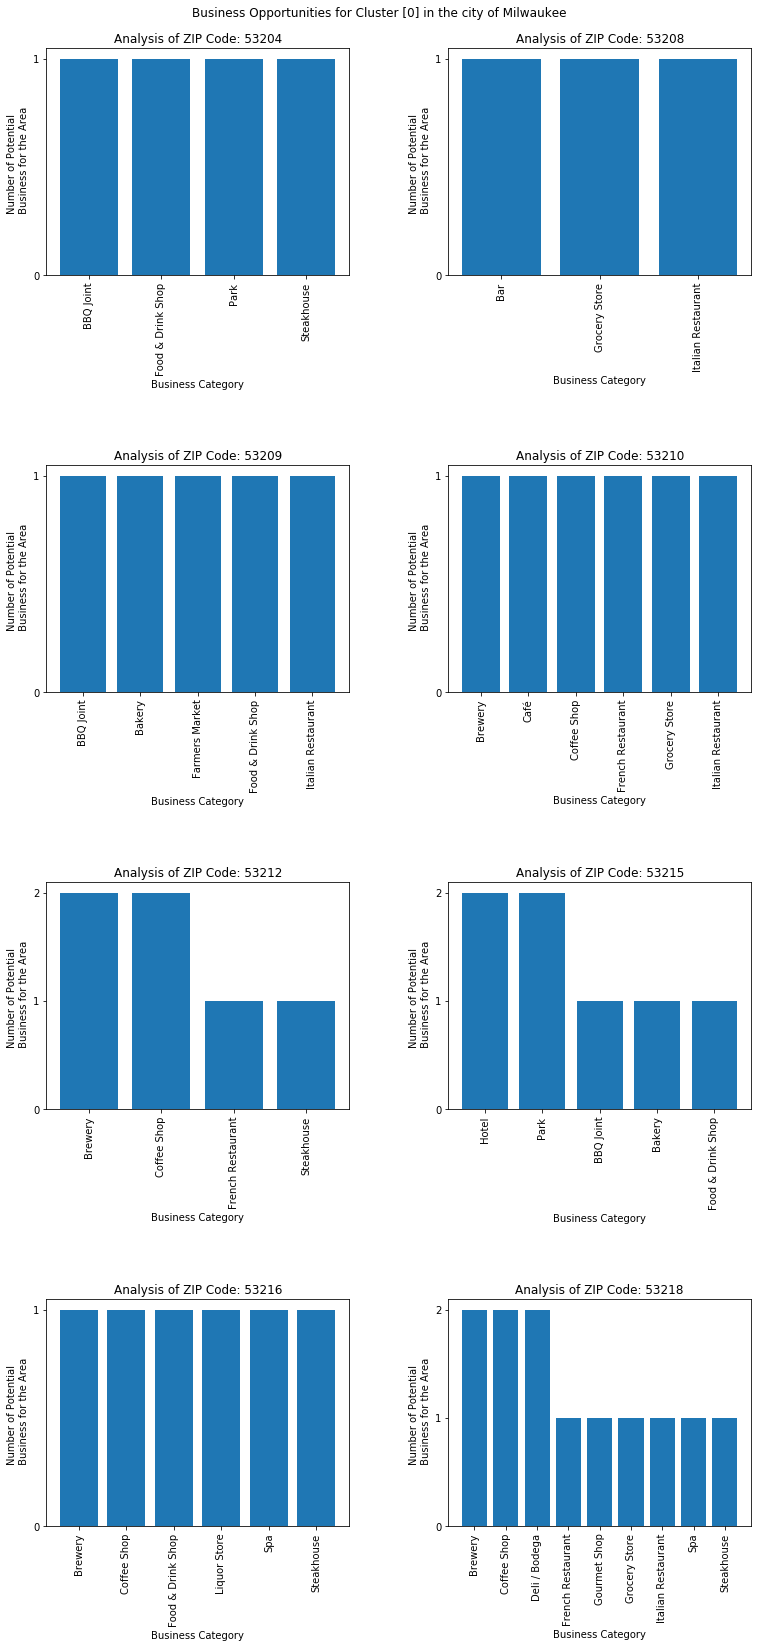

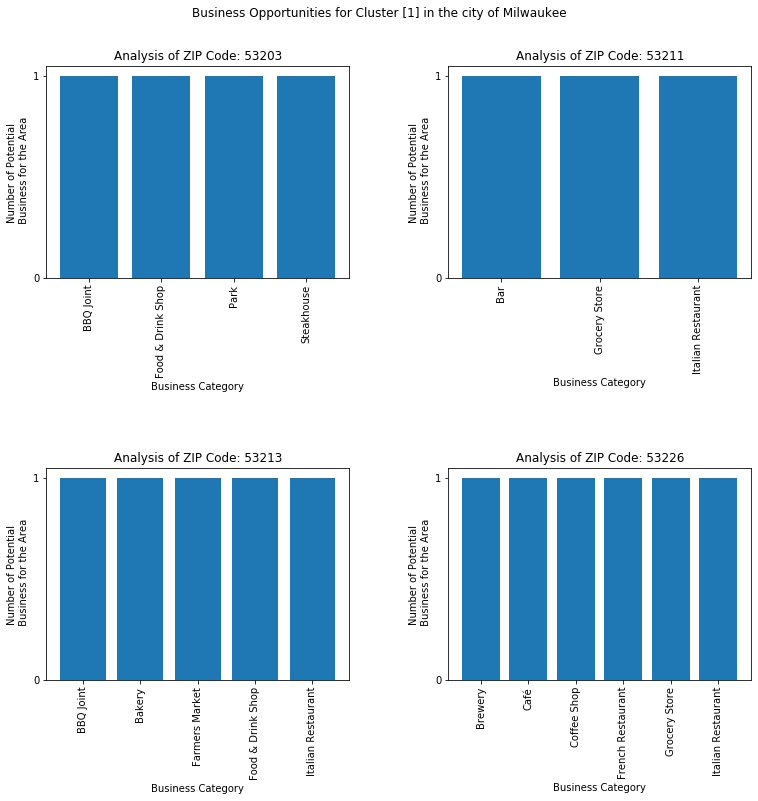

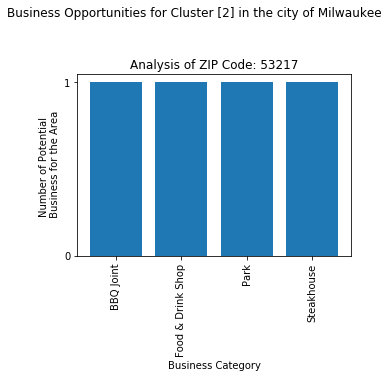

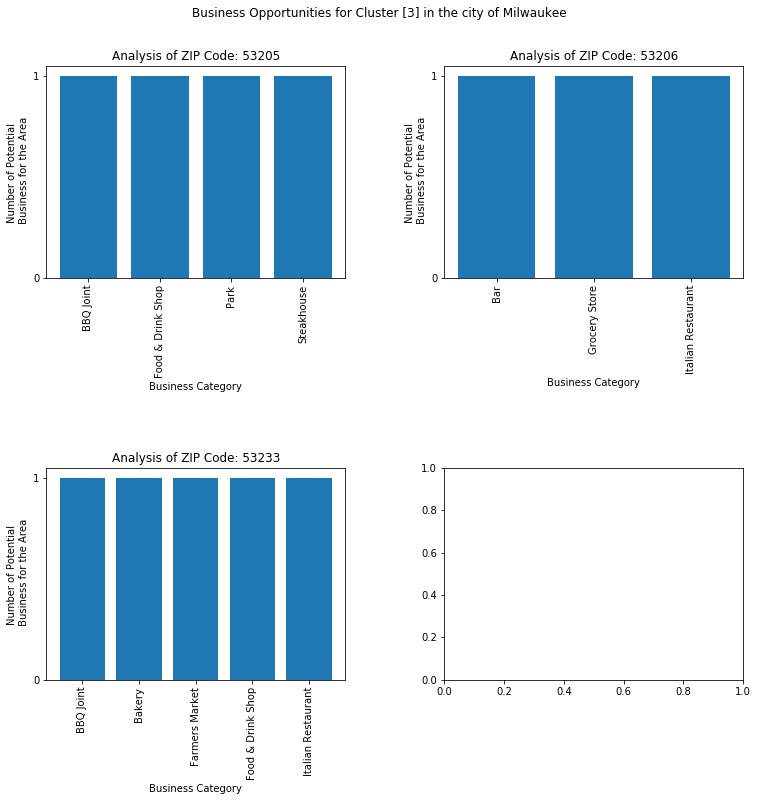

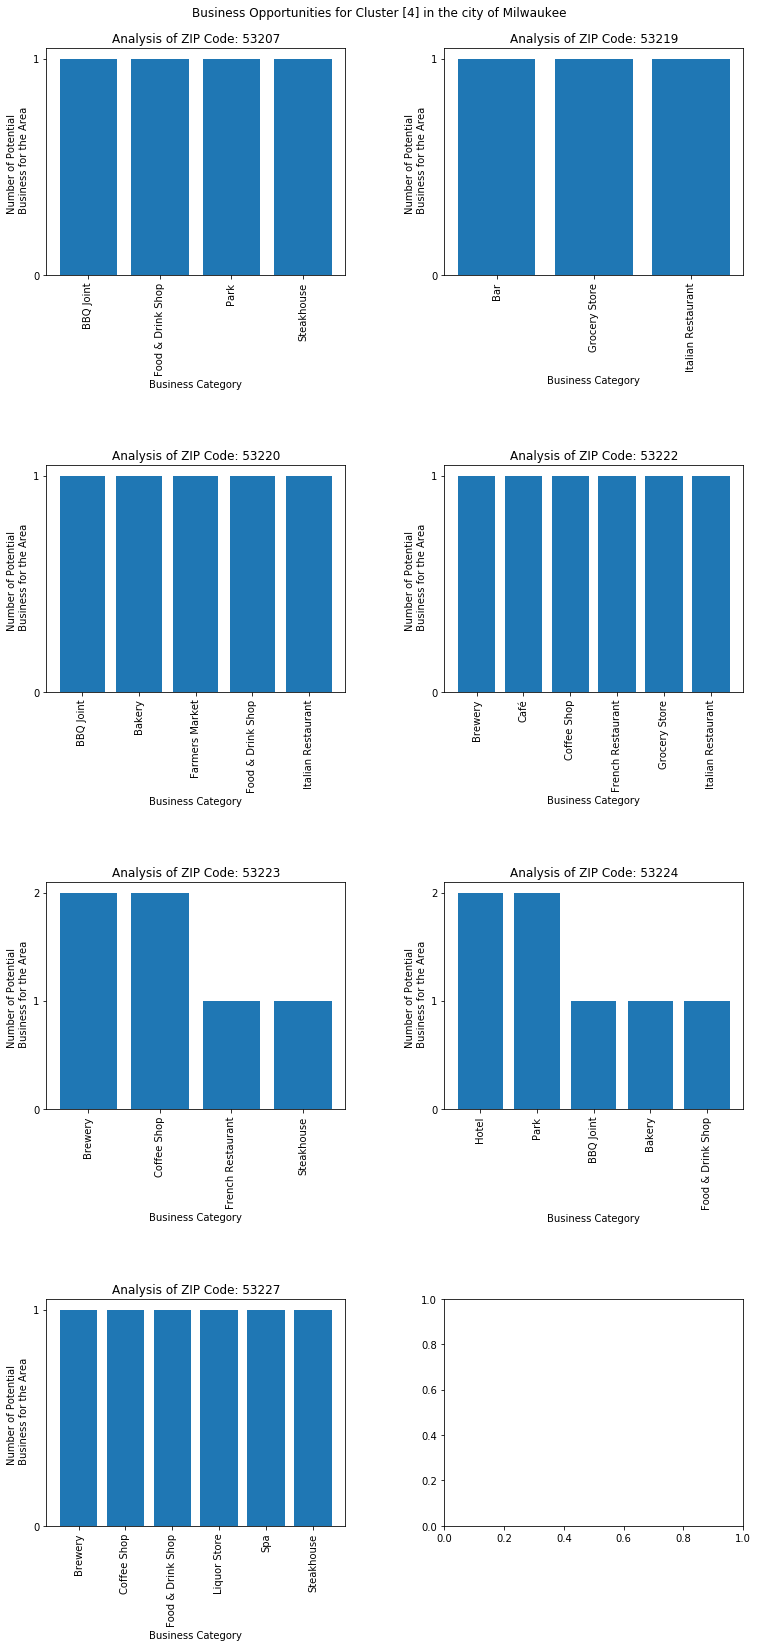

In [59]:
#Visualize the results for all the clusters in the list
for s in range(len(listSimilarZIP)):
    varn = s
    CC12 = getIndOpp(getAllOpp(getsimilarzipcodes(commonZIPdf,listSimilarZIP[varn][0]),Copydf),getsimilarzipcodes(commonZIPdf,listSimilarZIP[varn][0]));  
    
    visualizeResults(CC12)
    
